# 1: Business Problem

<font face=Times_New_Romance>
A women's E-commerce store wants to analyse the reviews of their customers on the products they sell. They want to know the current opinion of the customers and the areas where they can improve upon. They also enquired about a seasonal analysis of their products.</font>

In [1]:
 #Importing necessary modules

import nltk
import string
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import pandas as pd
import pprint as pp
from nltk.tag import pos_tag
from collections import Counter
from wordcloud import WordCloud
from nltk.draw.dispersion import dispersion_plot
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# 2: Uploading, Exploring and Cleaning Data

In [2]:
#Fetching E-Commerce Reviews Dataset and displaying the first five rows in the dataset

df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
#Converting dataset to dataframe and selecting only the required columns

df= df[["Review Text","Rating","Class Name"]]

#Information regarding the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  22641 non-null  object
 1   Rating       23486 non-null  int64 
 2   Class Name   23472 non-null  object
dtypes: int64(1), object(2)
memory usage: 550.6+ KB


In [4]:
#Deleting the rows containing NULL(NaN) value

df = df.dropna()

df.head()

,Review Text,Rating,Class Name
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates
1,Love this dress! it's sooo pretty. i happene...,5,Dresses
2,I had such high hopes for this dress and reall...,3,Dresses
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants
4,This shirt is very flattering to all due to th...,5,Blouses


In [5]:
#Displaying information regarding the reviews

print("Number of reviews available = ", df['Review Text'].count()) 
print("Number of unique reviews available = ", df['Review Text'].nunique()) 

Number of reviews available =  22628
Number of unique reviews available =  22621


In [6]:
#Displaying the first and last five reviews in the dataset

df['Review Text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 22628, dtype: object

# 3: Comparing Positive Reviews and Negative Reviews

## 3.1 Plotting an Histogram to Show  the Ratings Received by the E-Commerce Store

FIGURE 1 - Rating Histogram

22628


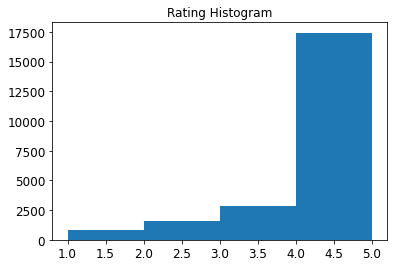

In [7]:
#Histogram depicting the ratings provided by customers

data = df['Rating']
bins=np.arange(min(data), max(data) + 1, 1)

print(df['Rating'].count())
plt.hist(df['Rating'], bins)

plt.title('Rating Histogram')
#plt.xlabel('Rating', fontsize = 15, color = 'b')
#plt.ylabel('Values', fontsize = 15, color = 'b')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

## 3.2 Creating Filtered Positive Reviews and a Negative Reviews Dataframe

In [8]:
# Selecting positive reviews (rating 4 and above) and creating a dataframe for it
df_positive=df[df["Rating"]>=4]

# Selecting negative reviews (rating 3 and below) and creating a dataframe for it
df_negative=df[df["Rating"]<4]

print("Number of positive reviews available = ", df_positive.count()) 
print("Number of negative reviews available = ", df_negative.count()) 

Number of positive reviews available =  Review Text    17435
Rating         17435
Class Name     17435
dtype: int64
Number of negative reviews available =  Review Text    5193
Rating         5193
Class Name     5193
dtype: int64


In [9]:
df_negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5193 entries, 2 to 23484
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  5193 non-null   object
 1   Rating       5193 non-null   int64 
 2   Class Name   5193 non-null   object
dtypes: int64(1), object(2)
memory usage: 162.3+ KB


In [10]:
#Transfering the positive and negative reviews into a list
Positive_reviews = df_positive['Review Text'].tolist()
Negative_reviews = df_negative['Review Text'].tolist()

In [11]:
#Tockenizing the reviews
def review_tokenize(reviews, max_index):
    one_long_word= " ".join(reviews[0:max_index])
    return word_tokenize(one_long_word)

positive_reviews_tokens= review_tokenize(Positive_reviews, 17435)
negative_reviews_tokens= review_tokenize(Negative_reviews, 5193)

In [12]:
#Lowering the tokens

def lower_tokens(tokens_to_lower):
    Lowered_reviews_tokens = [word.lower() 
                  for word in tokens_to_lower] 
    return Lowered_reviews_tokens
    

Positive_reviews_tokens_lowered = lower_tokens(positive_reviews_tokens)
Negative_reviews_tokens_lowered = lower_tokens(negative_reviews_tokens)

In [13]:
# Removing the noise from the lowered tokens

meaningless_adjective_to_remove = ['great','nice','adorable','good','glad','favourite','pretty','better','best','gorgeous'
                                   'delighted','pleased','awesome','love','favorite','super','happy','fine','cute'
                                   'awful','terrible','disappointed','disappointing', 'fit','beautiful','small',
                                   'last','next','usual','easy','overall','online','material',
                                   'left','right','front','back','bottom','top','underneath', 'worn', 'large', 'big',
                                   'first','second','third','best','better','least','little',
                                   'important','essential','significant',
                                  'perfect','true','dress','more','many','wear','chest','waist',
                                    'much','little','find', 'able','wish','sure','worth','extra','enough','dress','sweater']

def remove_stopwords_from_lowered_reviews(lowered_reviews_tokens, extra_words_to_remove):
    some_more_tokens_to_remove = [ 'rs', 'per', 'would', '000','one','may','mr','nil','and','ok.','sooo']
    extra_punctuation_to_remove = ['.', '..','...','....','.....','......','(', ').', '.','"', "'m","'s","''","n't",'-','bc','0p','me-','lbs','sp',
                                   'xs','xl','xxl','xxs']
    individual_letters = list(string.ascii_lowercase)
    numbers_1_to_100 = [str(integer) 
                        for integer in range(101)]
    remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) 
        + numbers_1_to_100 + extra_punctuation_to_remove + individual_letters+ some_more_tokens_to_remove+extra_words_to_remove)
    filtered_text=[token 
                 for token in lowered_reviews_tokens
                 if not token in remove_these]
    return filtered_text

    

filtered_positive_text= remove_stopwords_from_lowered_reviews(Positive_reviews_tokens_lowered, meaningless_adjective_to_remove)
filtered_negative_text= remove_stopwords_from_lowered_reviews(Negative_reviews_tokens_lowered, meaningless_adjective_to_remove)

## 3.3 Entity Recognition——Analyzing Adjectives of the Positive and Negative Reviews

In [14]:
#Finding the adjectives in the reviews

adjectives = ['JJ','JJS','JJR']

def adjective_entity(list_of_words_cleaned,types_to_find):
    tagged_filtered = nltk.pos_tag(list_of_words_cleaned)
    adjectives_in_reviews = [word 
             for (word, class_type) in tagged_filtered
             if class_type in types_to_find]
    return adjectives_in_reviews


review_adjectives_pos = adjective_entity(filtered_positive_text,adjectives)
review_adjectives_neg = adjective_entity(filtered_negative_text,adjectives)

## 3.4 Wordcloud for Positive and Negative Review

FIGURE 2 - Wordcloud for Positive Reviews

FIGURE 3 - Wordcloud for Negative Reviews

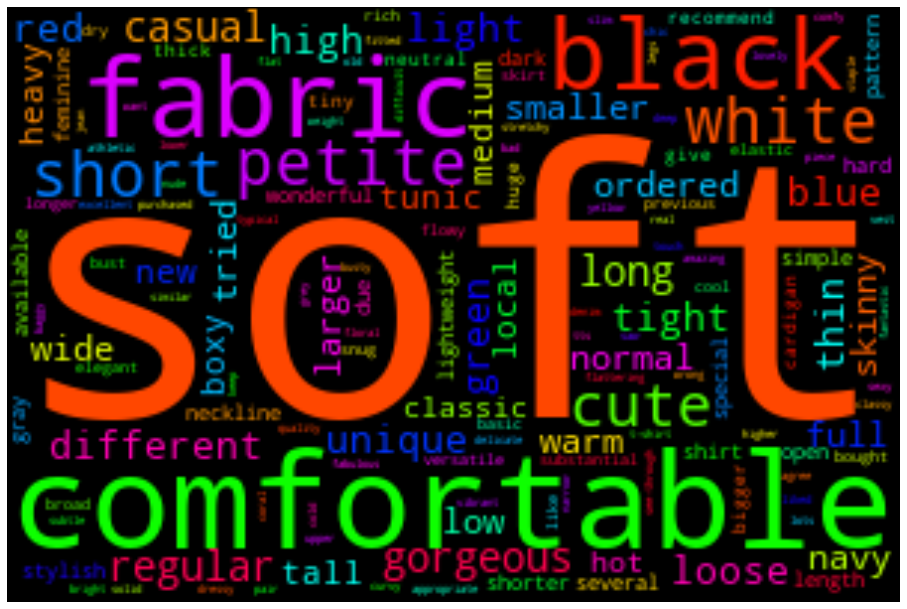

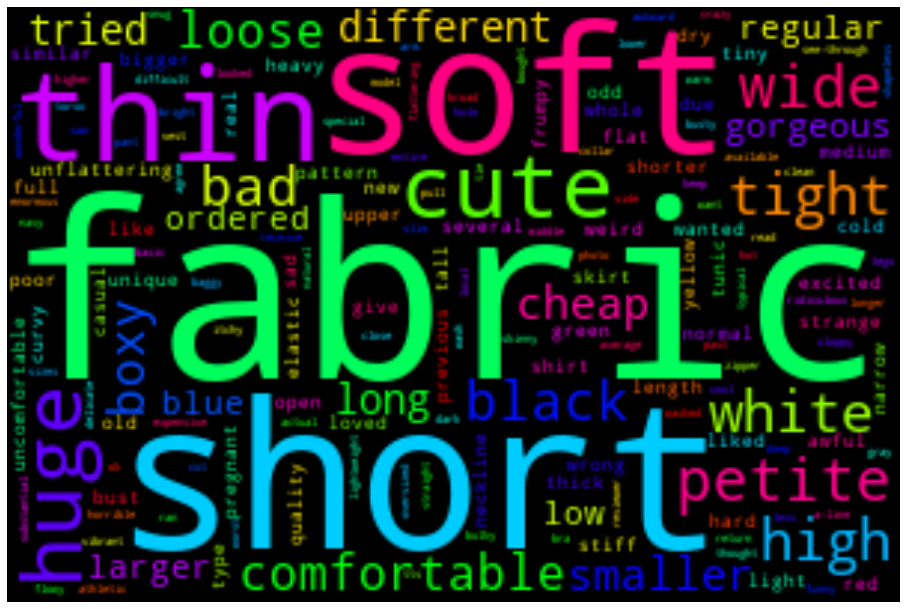

In [15]:
#Creating wordcloud for positive and negative reviews

def wordcloud_for_reviews(words_to_show):
    positive_frequencies_dict = Counter(words_to_show)
    cloud = WordCloud(width=300, height=200, max_font_size=160,colormap="hsv").generate_from_frequencies(positive_frequencies_dict)
    plt.figure(figsize=(16,12))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

    
wordcloud_for_reviews(review_adjectives_pos)
wordcloud_for_reviews(review_adjectives_neg)

## 3.5 Frequency Dispersion Analysis of the Adjectives In the Reviews


FIGURE 4 - Frequency Dispersion Analysis of the Adjectives in the Positive Rreviews

FIGURE 5 - Frequency Dispersion Analysis of the Adjectives in the Negative Reviews

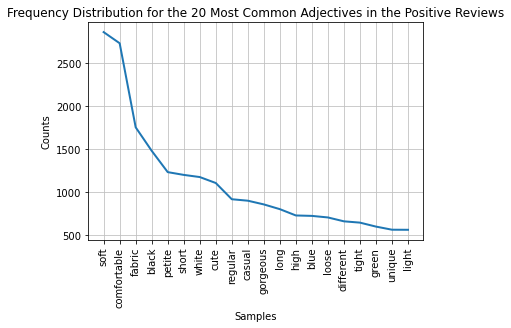

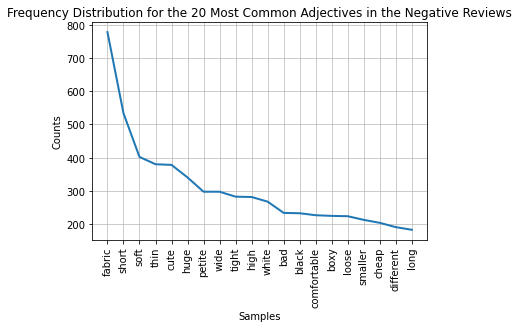

In [16]:
# Creating the Frequency Dispersion of the adjectives in the reviews

def Frequency_dispersion_graph(frequent_words,graph_title):
    fdist_positive = FreqDist(frequent_words)
    fdist_positive.plot(20,title = graph_title)

Frequency_dispersion_graph(review_adjectives_pos,'Frequency Distribution for the 20 Most Common Adjectives in the Positive Reviews')
Frequency_dispersion_graph(review_adjectives_neg,'Frequency Distribution for the 20 Most Common Adjectives in the Negative Reviews')


## 3.6 Lexical Dispersion Analysis of Items Sold Online

FIGURE 6 - Lexical Dispersion for Items with Good Reviews

FIGURE 7 - Lexical Dispersion for Items that Need Improvement

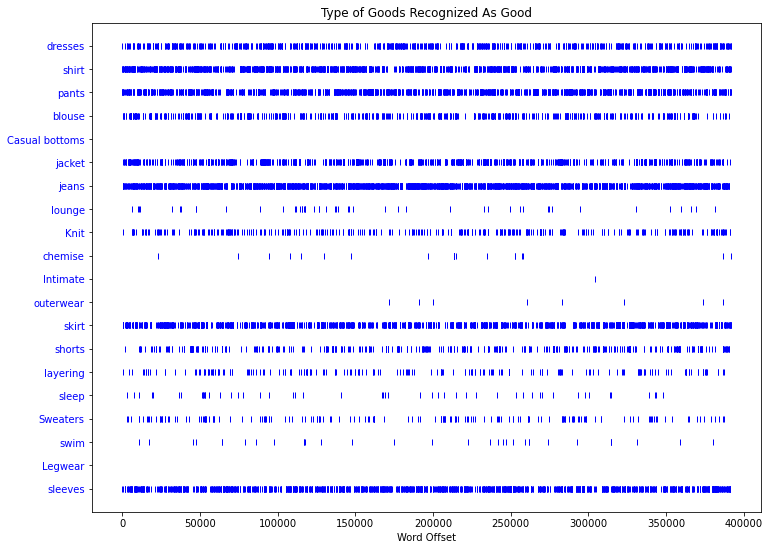

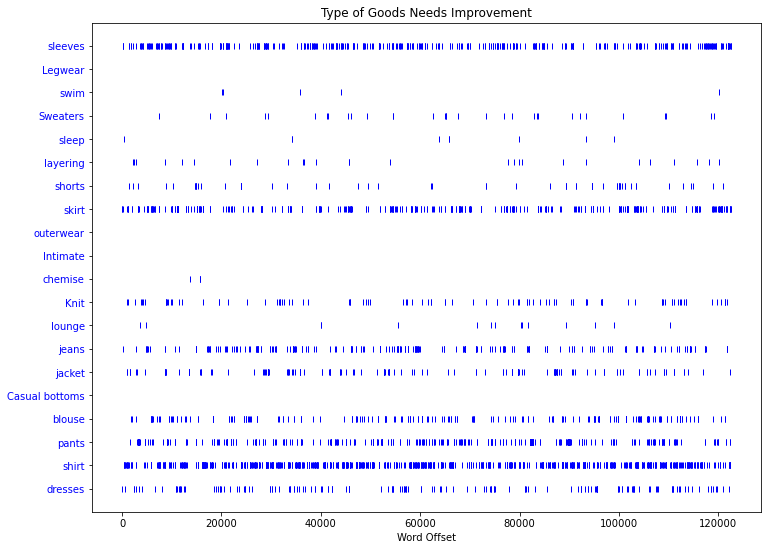

In [17]:
#Creating Lexical Dispersion for items that are sold

def Lexical_dispersion_analysis(text,key_feature,graph_title):
    plt.figure(figsize=(12, 9))
    dispersion_plot(text, key_feature, ignore_case=True, title=graph_title)

Class_of_clothes = ['dresses','shirt','pants','blouse','Casual bottoms','jacket','jeans','lounge','Knit','chemise',
                    'Intimate','outerwear','skirt','shorts','layering','sleep','Sweaters','swim','Legwear','sleeves']

pos_lexical_dispersion = Lexical_dispersion_analysis(filtered_positive_text,Class_of_clothes,"Type of Goods Recognized As Good")
neg_lexical_dispersion = Lexical_dispersion_analysis(filtered_negative_text,Class_of_clothes,"Type of Goods Needs Improvement")


# 4: Seasonal Clothing Style Analysis

## 4.1 Pre-processing Data for Seasonal Analysis of the Items that Are Sold


In [18]:
# Creating a list containing the reviews of the items
reviews = df['Review Text'].tolist()
reviews[0]

'Absolutely wonderful - silky and sexy and comfortable'

In [19]:
#Tockenizing the text and lowering the tokens

all_reviews_tokens = review_tokenize(reviews, 22621)
reviews_tokens_lowered = lower_tokens(all_reviews_tokens)

In [20]:
#Removing the noise

some_type_of_cloth_to_remove = ['dress','shirt','pants','blouse','bottom','jacket','jeans','lounge','Knit','chemise',
                              'intimate','outerwear','skirt','shorts','layering','sleep','sweater','swim','legwear','sleeves']

some_nouns_noise_to_remove = ['wish','good','buy','fun','perfect','cozy','cute','lots','party','crisp','love','itchy','cuter',
                              'medium','beauty','cagrcoal','body','summer','bit','fall', 'super','wardrobe','staple',
                              'top','work','piece','way','beautiful']

some_type_of_colors_to_remove = ['white','black','blue','pink','green','red','grey','yellow','orange','purple']

some_names_to_remove= ['henley','oerson','pernette','person']

Noise_to_nouns_analysis =some_type_of_cloth_to_remove + some_nouns_noise_to_remove +some_names_to_remove
filtered_review_text = remove_stopwords_from_lowered_reviews (reviews_tokens_lowered,Noise_to_nouns_analysis)

## 4.2  Analyzing Most Important Factors for Customers ——Noun Analysis

FIGURE 8 - Frequency Dispersion Analysis of the Nouns 

In [21]:
#Extracting the nouns from the reviews of the items

Nouns = ['NN','NNS']
Important_noun_factors= adjective_entity(filtered_review_text,Nouns)

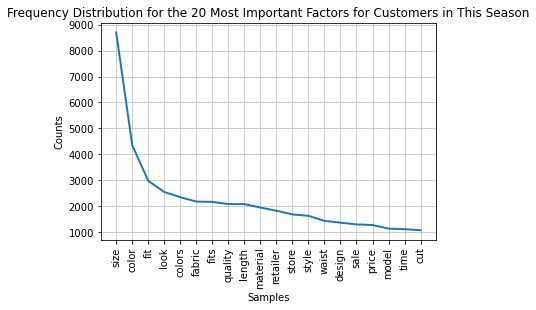

In [22]:
#Creating the frequency distribution for the factors required by the customers in their products

Frequency_dispersion_graph(Important_noun_factors,'Frequency Distribution for the 20 Most Important Factors for Customers in This Season')

## 4.3 Colour Preference

FIGURE 9 - Lexical Dispersion of the Colours Preferred by the Customer in the Season

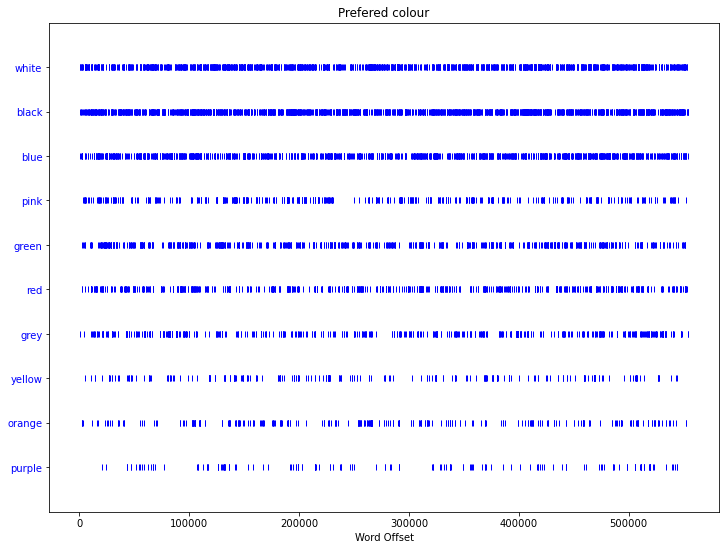

In [23]:
# Creating a Lexical Dispersion to depict the colours required by the customer in a particular season

common_colors=['white','black','blue','pink','green','red','grey','yellow','orange','purple']
Colour_lexical_dispersion = Lexical_dispersion_analysis(filtered_review_text,common_colors,'Prefered colour')

# 5: Inferences

<font face=Times_New_Romance>
The dataset, Women's E-commerce,  contained the reviews on the products that were purchased by the customers. Overall their customers were very happy with their products. This is depicted in Figure 1 as the majority of the customers rated 4.0 and above whereas only a minority rated the products 3.0 and below. To further figure out the facets to improve, we analysized the reviews data for the two dimensions below:  
    
    
    

 1.	The current stand of the customers  
    
    By comparing the difference between positive reviews (Rating >= 4) and negative reviews (Rating < 4), we can identify the important factors that consumers care about.

    **Figure 2,3,4 & 5** compares the wordcloud and frequency of adjectives the customers used to describe the products, demonstrating they are happy with soft and comfortable fabric products of white and black color, while unhappy with those with unsuitable sizes（too short, wide etc）and clothes with normal style. These information gives an understanding of the features that are most admired by the customers.

    **Figure 6 & 7** shows the lexical dispersion of different types of clothing. Customers are unhappy with skirts, shirts and sleeves but they are happy with dresses, jeans and pants. These information give an understanding of the products and their features the client can improve upon.
                                                                         
                                                                                                         
2.	Seasonal Analysis of the products  

    **Figure 8** depicts the frequency distribution of the 20 most mentioned facets in this season. Size, color, fitness and materials are the most determining facets and the type of retailer, design and cut also contribute to sales. **Figure 9** shows the frequency of the colours mentioned by the customers in the reviews. This shows that stacking products with the colours: white, black and blue, are needed as customers prefer these colours in this season.

 </font>                                                                                             

# 6: Limitation

<font face=Times_New_Romance>

1.	The dates of the reviews are not mentioned to give the timeline of the seasonal analysis.

2.	Product ID was missing. This can help to match the negative reviews and its corresponding item.
</font>